In [1]:
import pandas as pd                                     # To work on data manipulation 
import numpy as np                                      # It is used for numerical python
import seaborn as sns                                   # For Visualization
import matplotlib.pyplot as plt                         # For Visualization
from sklearn.model_selection import train_test_split    # To split the data (train and test)
from sklearn.linear_model import SGDRegressor           # To build the model (S.G.D)
from sklearn.preprocessing import StandardScaler        # To convert the predictor to the same scale(To scale down the data where mean =0 and std = 1) 
from sklearn.metrics import mean_squared_error          # To find the MSE (error)   To check the performance of your model 
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df = pd.read_csv('bigmarket.csv')
df.head()

,Month,Store,Sales
0,Jan,A,31037
1,Jan,B,20722
2,Jan,C,24557
3,Jan,D,34649
4,Jan,E,29795


In [3]:
df.shape

(25, 3)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Month   25 non-null     object
 1   Store   25 non-null     object
 2   Sales   25 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 732.0+ bytes


In [5]:
df.describe()

,Sales
count,25.00000
mean,34318.44000
std,8604.09835
min,20722.00000
25%,28312.00000
50%,31874.00000
75%,40241.00000
max,47814.00000


In [6]:
df.isnull().sum()

Month    0
Store    0
Sales    0
dtype: int64

In [8]:
df[df.duplicated(keep = False)]

,Month,Store,Sales


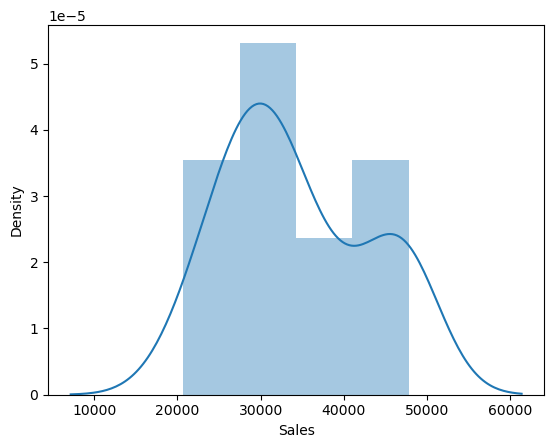

In [9]:
sns.distplot(df.Sales)
plt.show()

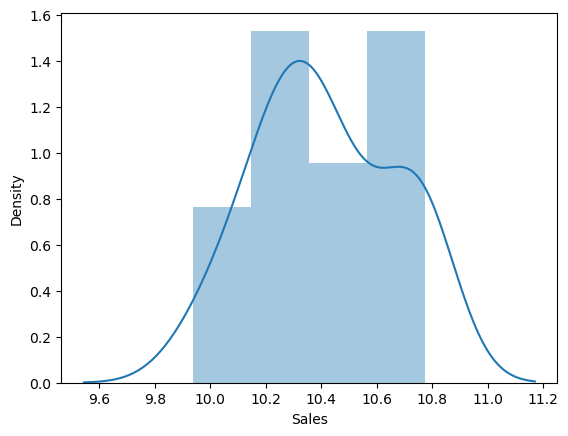

In [10]:
sns.distplot(np.log(df.Sales))
plt.show()

In [11]:
df.head()

,Month,Store,Sales
0,Jan,A,31037
1,Jan,B,20722
2,Jan,C,24557
3,Jan,D,34649
4,Jan,E,29795


In [13]:
df1 = np.log(df.Sales)
df1.head()

0    10.342935
1     9.938951
2    10.108752
3    10.453024
4    10.302096
Name: Sales, dtype: float64

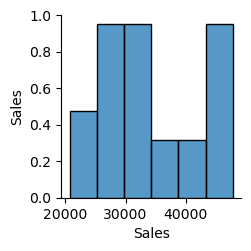

In [14]:
sns.pairplot(data = df)
plt.show()

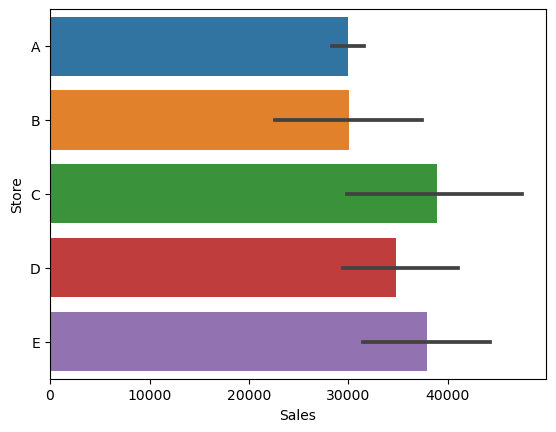

In [15]:
sns.barplot(x ='Sales', y = 'Store', data = df )
plt.show()

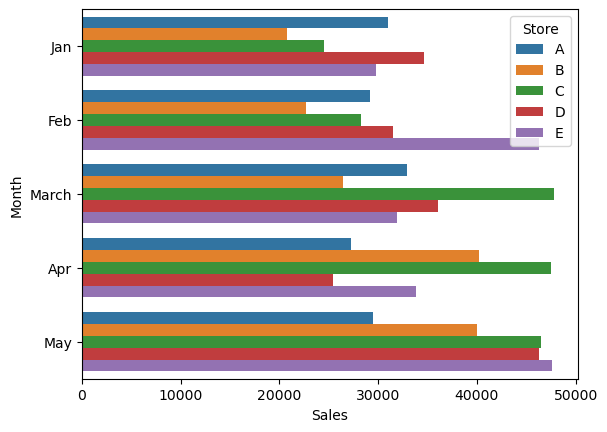

In [18]:
sns.barplot(x ='Sales', y = 'Month',hue = 'Store', data = df )
plt.show()

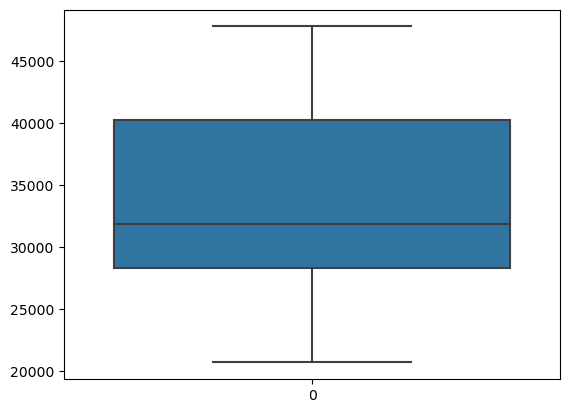

In [19]:
sns.boxplot(df.Sales)
plt.show()

In [20]:
df3 = pd.get_dummies(df,drop_first=True)
df3.head()

,Sales,Month_Feb,Month_Jan,Month_March,Month_May,Store_B,Store_C,Store_D,Store_E
0,31037,False,True,False,False,False,False,False,False
1,20722,False,True,False,False,True,False,False,False
2,24557,False,True,False,False,False,True,False,False
3,34649,False,True,False,False,False,False,True,False
4,29795,False,True,False,False,False,False,False,True


In [22]:
df4 = pd.get_dummies(df.Store,drop_first=True)
df4.head()

,B,C,D,E
0,False,False,False,False
1,True,False,False,False
2,False,True,False,False
3,False,False,True,False
4,False,False,False,True


In [27]:
numeric_dummies = df4.astype(int)
numeric_dummies.head()

,B,C,D,E
0,0,0,0,0
1,1,0,0,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,1


In [28]:
merge = pd.concat([numeric_dummies,df],axis=1)
merge.head()

,B,C,D,E,Month,Store,Sales
0,0,0,0,0,Jan,A,31037
1,1,0,0,0,Jan,B,20722
2,0,1,0,0,Jan,C,24557
3,0,0,1,0,Jan,D,34649
4,0,0,0,1,Jan,E,29795


In [29]:
df1=merge.drop('Store',axis=1)


In [34]:
X = df3.drop('Sales', axis = 1)
y = df3.Sales

In [35]:
X.head()

,Month_Feb,Month_Jan,Month_March,Month_May,Store_B,Store_C,Store_D,Store_E
0,False,True,False,False,False,False,False,False
1,False,True,False,False,True,False,False,False
2,False,True,False,False,False,True,False,False
3,False,True,False,False,False,False,True,False
4,False,True,False,False,False,False,False,True


In [36]:
y.head()

0    31037
1    20722
2    24557
3    34649
4    29795
Name: Sales, dtype: int64

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [38]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [39]:
train_score = lr.score(X_train,y_train)
print('Train Score = ',train_score)

Train Score =  0.579384119897164


In [41]:
y_pred_train = lr.predict(X_train)      # ----- i am going to predict y_train     checking over fitting issue
y_pred_test = lr.predict(X_test)     

In [42]:
from sklearn.metrics import r2_score

train_score = r2_score(y_train,y_pred_train)
test_score = r2_score(y_test,y_pred_test)

print(f'Training Accuracy = {train_score}\nTesting Accuracy = {test_score}')

Training Accuracy = 0.579384119897164
Testing Accuracy = -1.7336847865379719
